In [24]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.color import rgb2gray,rgb2hsv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

from skimage.util import random_noise
from skimage.filters import median
from skimage.feature import canny
from skimage.measure import label
from skimage.color import label2rgb

from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

import commonfunctions as cf # this a custom module found the commonfunctions.py
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity

# Show the matlpotlib figures inside the notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***Question 1***
For the given image (Q1.png), identify the existing issue(s). Use 2 different methods to solve each issue, clearly indicating your choice of parameters (if any). Comment on the result of each method (How does this method solve the issue?)


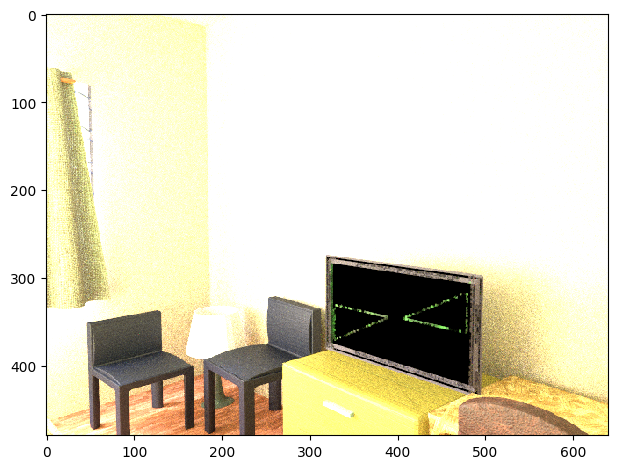

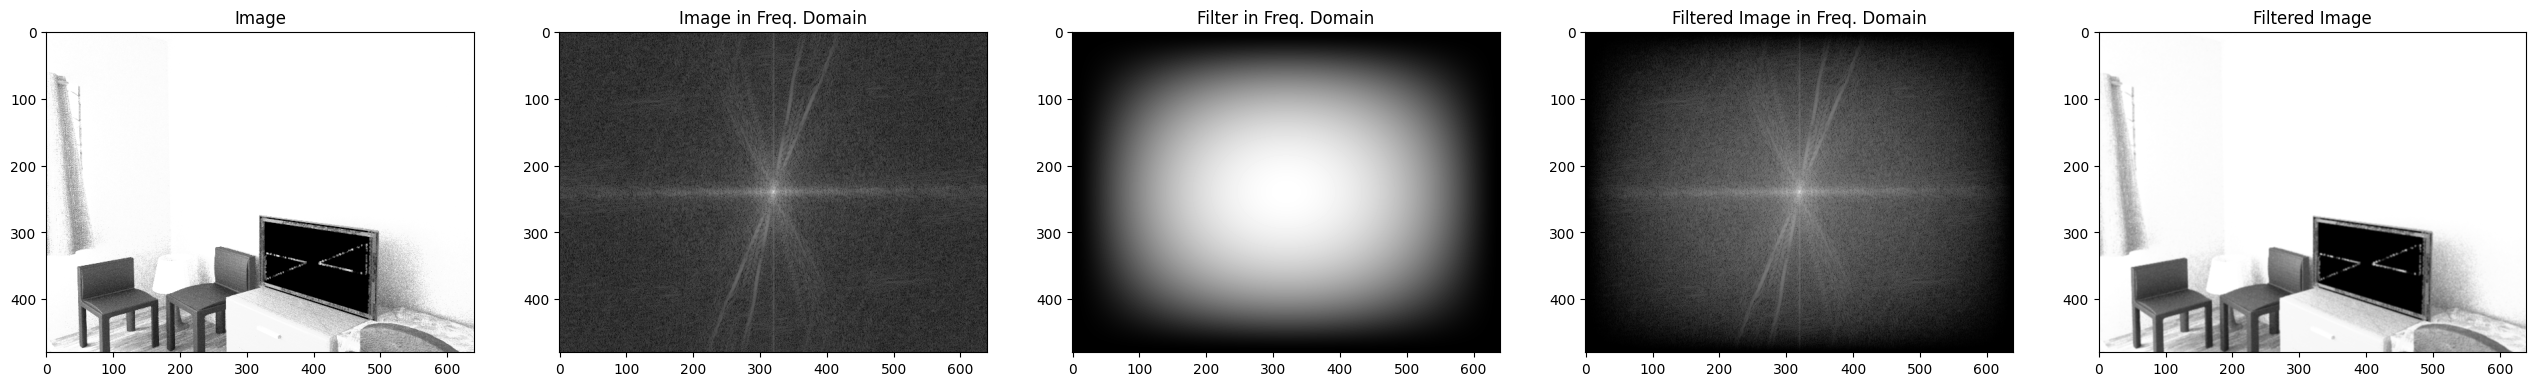

NameError: name 'filtered_img' is not defined

In [27]:
img = io.imread('D:\Programs Space\Github\CMPN446---Image-Processing-and-Computer-Vision\Labs\Model-B\Q1.png')
io.imshow(img)
io.show()

# def HSV_image(img):
#    RGBimage = io.imread(img)
#    HSV_image = rgb2hsv(RGBimage)
   
#    #0: Hue channel, 1: saturation channel, 2: value channel
#    images = [RGBimage, HSV_image[:, :, 0], HSV_image[:, :, 1], HSV_image[:, :, 2]]
#    titles = ['Original RGB', 'Hue', 'Saturation', 'Value']
#    show_images(images, titles)
# HSV_image('Q1.png')

def apply_filter_in_freq(img, f):
    img_in_freq = fftpack.fft2(img)
    
    # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
    filter_in_freq = fftpack.fft2(f, img.shape)
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = fftpack.ifft2(filtered_img_in_freq)
    
    cf.show_images([img,
                fftpack.fftshift(np.log(np.abs(img_in_freq)+1)), # log for better intensity scale, 
                                                                 # shift to make zero freq at center
                fftpack.fftshift(np.log(np.abs(filter_in_freq)+1)),
                fftpack.fftshift(np.log(np.abs(filtered_img_in_freq)+1)),
                np.abs(filtered_img)
                ], ['Image', 'Image in Freq. Domain', 'Filter in Freq. Domain', 'Filtered Image in Freq. Domain', 'Filtered Image'])
    
# Let's try some filters on a sample image
img = rgb2gray(io.imread('Q1.png')[:, :,:3])

# This is a low pass filter (more on that in the upcoming lectures)
f=np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

apply_filter_in_freq(img, f)


***Question 3***
For the given image (Q3.png), use two different approaches to get the mask of the bunny statue (foreground object), and then obtain a minimal representation of the mask. Refer Q3-Explain.png for the required target mask.

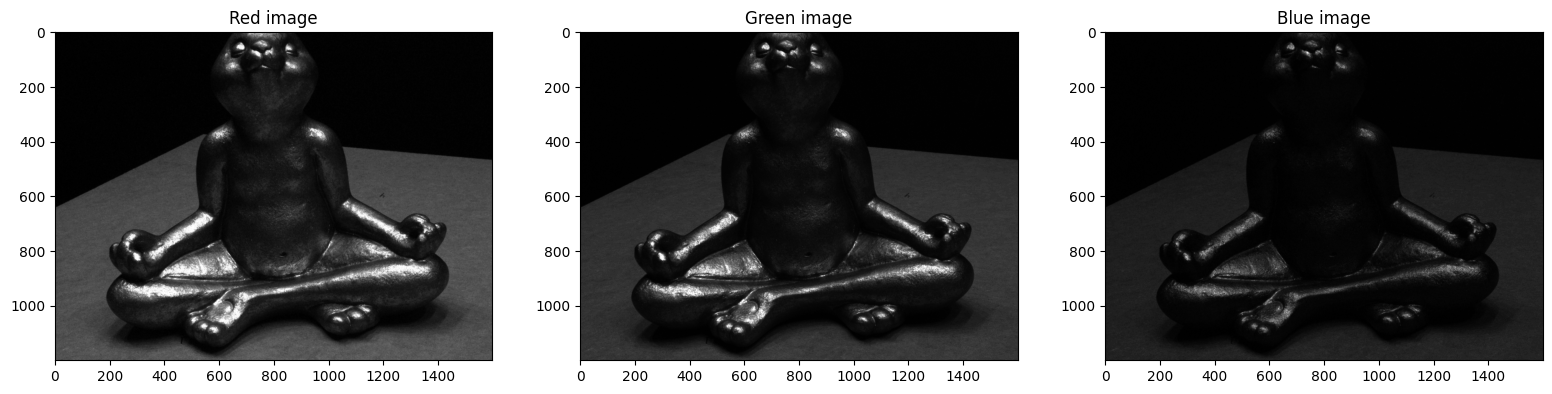

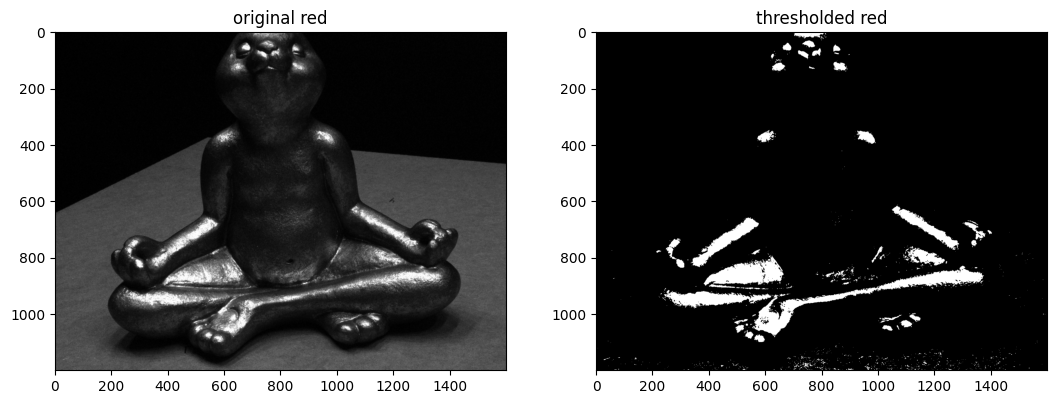

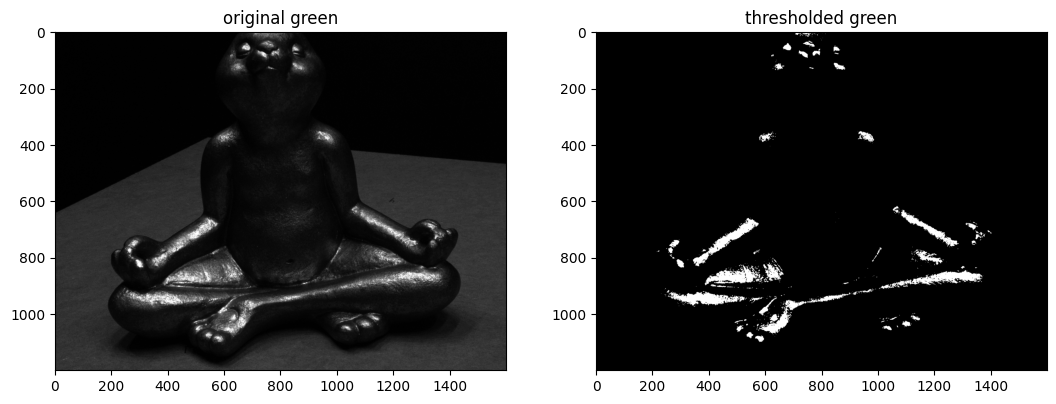

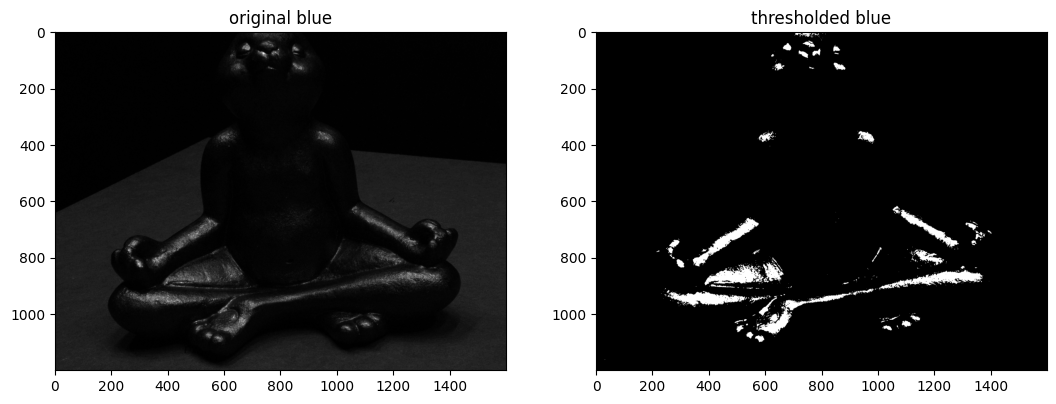

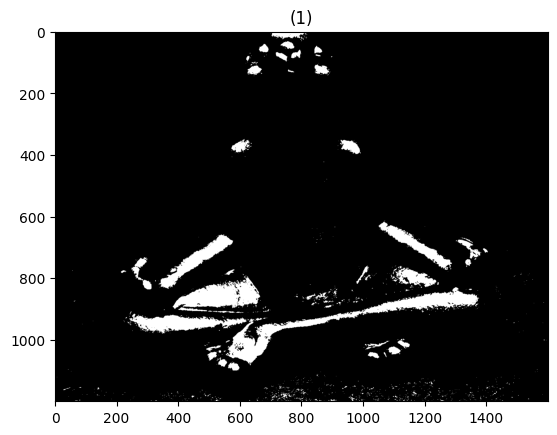

In [40]:
img = io.imread('Q3.png')
img_float = img.astype('float')

red_image = img_float[:,:,0]
green_image = img_float[:,:,1]
blue_image = img_float[:,:,2]
show_images([red_image,green_image,blue_image],["Red image","Green image","Blue image"])

red_image_thresh = red_image > 85
show_images([red_image, red_image_thresh],["original red", "thresholded red"])

green_image_thresh = green_image > 90
show_images([green_image, green_image_thresh],["original green", "thresholded green"])

blue_image_thresh = green_image > 80
show_images([blue_image, blue_image_thresh],["original blue", "thresholded blue"])

elsora_el7lwa = red_image_thresh + green_image_thresh + blue_image_thresh
show_images([elsora_el7lwa])

***Question 4***
Create a grayscale image for each of the following plot as pixel intensity histogram:
-	Linear line ( x: [0, 255], y: [256, 512] ).


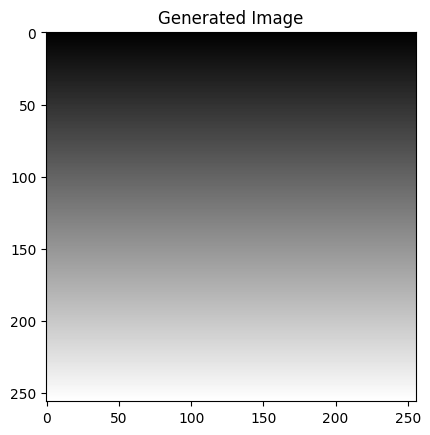

TypeError: showHist() takes 1 positional argument but 2 were given

In [21]:
drawnImage=np.ones([256, 256])
for i in range(0,256):
    drawnImage[i][:] = (i/255) * np.ones(256)

show_images([drawnImage], ['Generated Image'])
showHist(drawnImage, histogram(drawnImage, nbins=256))